In [1]:
from FinMind.strategies import BackTest
import FinMind
from FinMind.data import DataLoader
import matplotlib.pyplot as plt
from backtest.backtest import backtest
import pandas as pd
from dotenv import dotenv_values
from copy import copy, deepcopy
config = dotenv_values(".env")

In [2]:
START_DATE = "2023-01-03"
END_DATE = "2023-10-31"
TRADER_FUND = 1_000_000

## FinMind Backtest Method

In [3]:
strategies = FinMind.strategies.__all__.copy()
strategies.remove('BackTest')
strategies

['Bias',
 'ContinueHolding',
 'InstitutionalInvestorsFollower',
 'Kd',
 'KdCrossOver',
 'MaCrossOver',
 'MacdCrossOver',
 'MaxMinPeriodBias',
 'NaiveKd',
 'ShortSaleMarginPurchaseRatio']

## Stock to evaluate

In [3]:
evaluate_index = ["2330", "2317", "2454", "2308", "2382", "2303", "2881", "2891", "2412", "2886", "2882", "1303", "3711", "2884", "1216", "2002", "2885", "1301", "3231", "2892", "5880", "2301", "2345", "2357", "5871", "3034", "3037", "3008", "2207", "1326", "2887", "1101", "2880", "2327", "2890", "2379", "2883", "3045", "5876", "2395", "4938", "1590", "2912", "6669", "2603", "2801", "4904", "6505", "9910", "2408"]
len(evaluate_index)

50

## Dataloader

In [5]:
data = DataLoader()
data.login_by_token(config['FINMIND_TOKEN'])
data

## Backtest by FinMind strategy

In [8]:
for stock_id in evaluate_index:
    backtest_obj = BackTest(
        stock_id=stock_id,
        start_date=START_DATE,
        end_date=END_DATE,
        trader_fund=TRADER_FUND,
        fee=0,
        data_loader=data
    )
    temp = deepcopy(backtest_obj)
    
    for strategy in strategies:
        backtest_obj.add_strategy(FinMind.strategies.__dict__[strategy])
        backtest_obj.simulate()
        backtest_obj._trade_detail.to_csv(f"output/{stock_id}_{strategy}.csv")
        del backtest_obj
        backtest_obj = deepcopy(temp)

G:\Documents\Proj_RL_Stock\rl-stock\.venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
G:\Documents\Proj_RL_Stock\rl-stock\.venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
G:\Documents\Proj_RL_Stock\rl-stock\.venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
G:\Documents\Proj_RL_Stock\rl-stock\.venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
G:\Documents\Proj_RL_Stock\rl-stock\.venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
G:\Documents\Proj_RL_Stock\rl-stock\.ven

## Backtest by ours RL model

In [4]:
RL_MODELS = [
    {
        "id": "e6bf7b700ffd4a0eb4a1563bfd6033f8",
        "name": "RecurrentPPO",
    },
    {
        "id": "524be7bbf5fd48838dcb448bc1743496",
        "name": "A2C",
    }
]

In [16]:
for stock_id in evaluate_index:
    for rl in RL_MODELS:
        rl_backtest_obj = backtest(stock_id, rl['id'], TRADER_FUND, START_DATE, END_DATE, False)
        rl_backtest_obj = pd.DataFrame(rl_backtest_obj[2]['actions'])
        rl_backtest_obj.to_csv(f"output/{stock_id}_{rl['name']}_Stochastic.csv")
        rl_backtest_obj = backtest(stock_id, rl['id'], TRADER_FUND, START_DATE, END_DATE, True)
        rl_backtest_obj = pd.DataFrame(rl_backtest_obj[2]['actions'])
        rl_backtest_obj.to_csv(f"output/{stock_id}_{rl['name']}_Deterministic.csv")

reset: 2883
reset: 2883
reset: 2883
reset: 2883
reset: 3045
reset: 3045
reset: 3045
reset: 3045
reset: 5876
reset: 5876
reset: 5876
reset: 5876
reset: 2395
reset: 2395
reset: 2395
reset: 2395
reset: 4938
reset: 4938
reset: 4938
reset: 4938
reset: 1590
reset: 1590
reset: 1590
reset: 1590
reset: 2912
reset: 2912
reset: 2912
reset: 2912
reset: 6669
reset: 6669
reset: 6669
reset: 6669
reset: 2603
reset: 2603
reset: 2603
reset: 2603
reset: 2801
reset: 2801
reset: 2801
reset: 2801
reset: 4904
reset: 4904
reset: 4904
reset: 4904
reset: 6505
reset: 6505
reset: 6505
reset: 6505
reset: 9910
reset: 9910
reset: 9910
reset: 9910
reset: 2408
reset: 2408
reset: 2408
reset: 2408


## Plot

In [19]:
strategies + [f"{rl['name']}_Stochastic" for rl in RL_MODELS] + [f"{rl['name']}_Deterministic" for rl in RL_MODELS]

['Bias',
 'ContinueHolding',
 'InstitutionalInvestorsFollower',
 'Kd',
 'KdCrossOver',
 'MaCrossOver',
 'MacdCrossOver',
 'MaxMinPeriodBias',
 'NaiveKd',
 'ShortSaleMarginPurchaseRatio',
 'RecurrentPPO_Stochastic',
 'A2C_Stochastic',
 'RecurrentPPO_Deterministic',
 'A2C_Deterministic']

In [7]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 16

<Axes: title={'center': "[2023-01-03 ~ 2023-10-31] Backtest Result of 0050's Constituent Stocks"}, xlabel='Date', ylabel='Return Rate'>

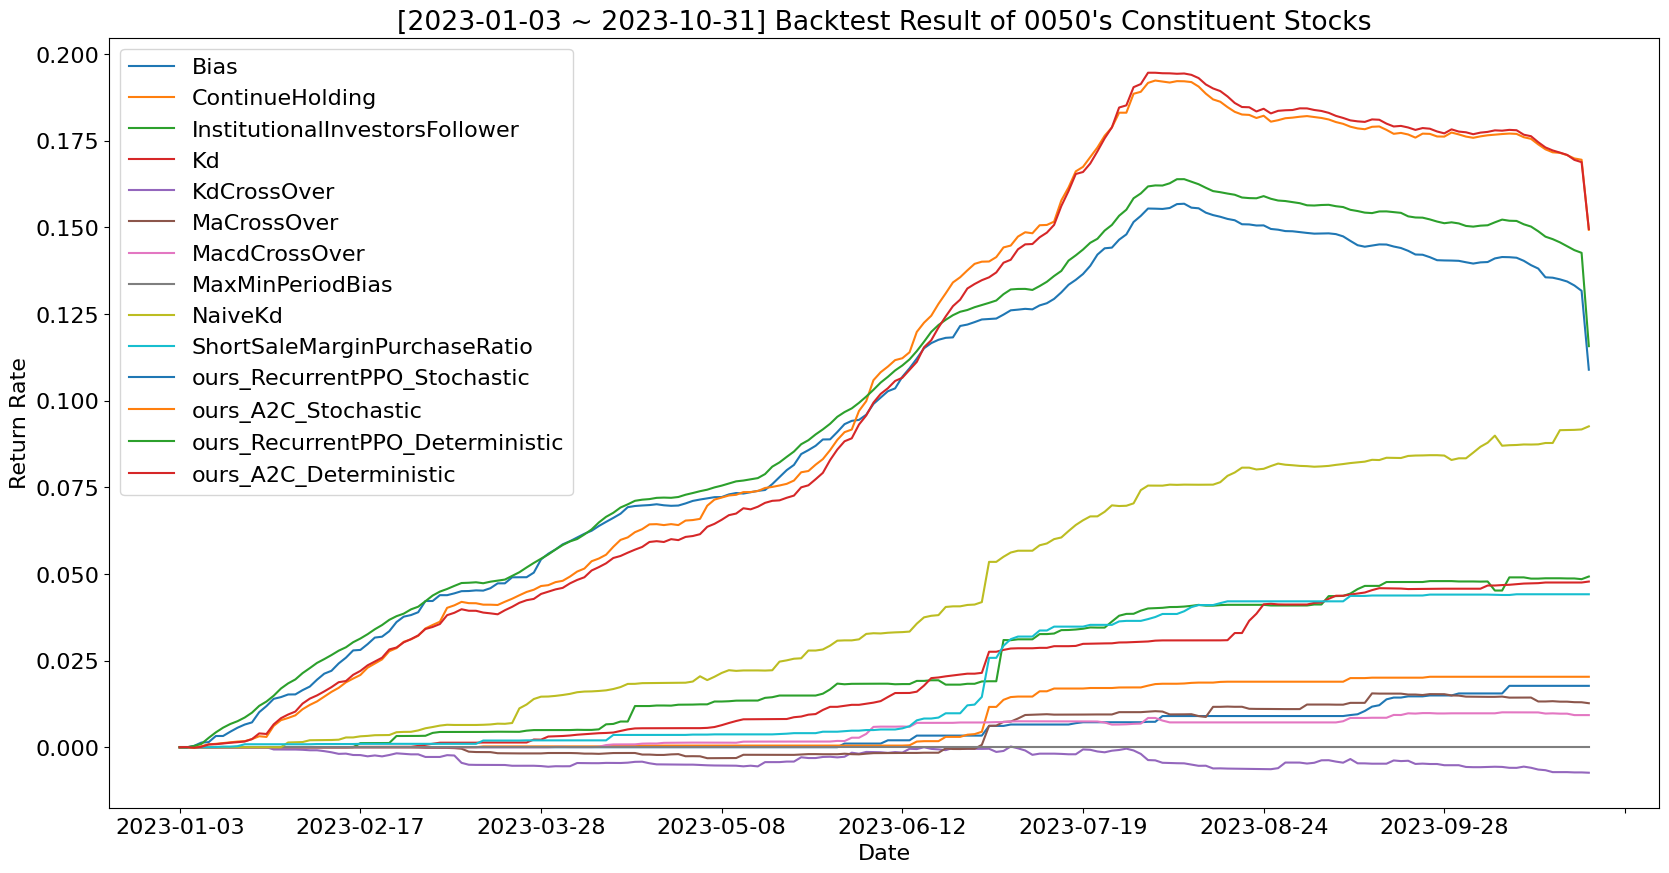

In [9]:
df = pd.DataFrame()

# FinMind strategy
for strategy in strategies:
    strategy_df = pd.DataFrame()
    for stock_id in evaluate_index:
        temp = pd.read_csv(f"output/{stock_id}_{strategy}.csv").set_index('date')
        strategy_df[stock_id] = temp['RealizedProfit'] / TRADER_FUND
        
    # sum all columns
    strategy_df['sum'] = strategy_df.sum(axis=1) / len(evaluate_index)
    strategy_df = strategy_df[['sum']]
    strategy_df = strategy_df.rename(columns={'sum': strategy})
    df = pd.concat([df, strategy_df], axis=1)

# RL model
for strategy in [f"{rl['name']}_Stochastic" for rl in RL_MODELS] + [f"{rl['name']}_Deterministic" for rl in RL_MODELS]:
    strategy_df = pd.DataFrame()
    for stock_id in evaluate_index:
        temp = pd.read_csv(f"output/{stock_id}_{strategy}.csv").set_index('date')
        strategy_df[stock_id] = temp['net'] / TRADER_FUND
        
    # sum all columns
    strategy_df['sum'] = strategy_df.sum(axis=1) / len(evaluate_index)
    strategy_df = strategy_df[['sum']]
    strategy_df = strategy_df.rename(columns={'sum': f"ours_{strategy}"})
    df = pd.concat([df, strategy_df], axis=1)

# sort by index
df = df.sort_index()

# fill na
df = df.fillna(0)

df.plot(
    title=f"[{START_DATE} ~ {END_DATE}] Backtest Result of 0050\'s Constituent Stocks",
    xlabel="Date",
    ylabel="Return Rate",
)


<Axes: title={'center': "[2023-01-03 ~ 2023-10-31] Backtest Result of 0050's Constituent Stocks (Normalized)"}, xlabel='Date', ylabel='Return Rate'>

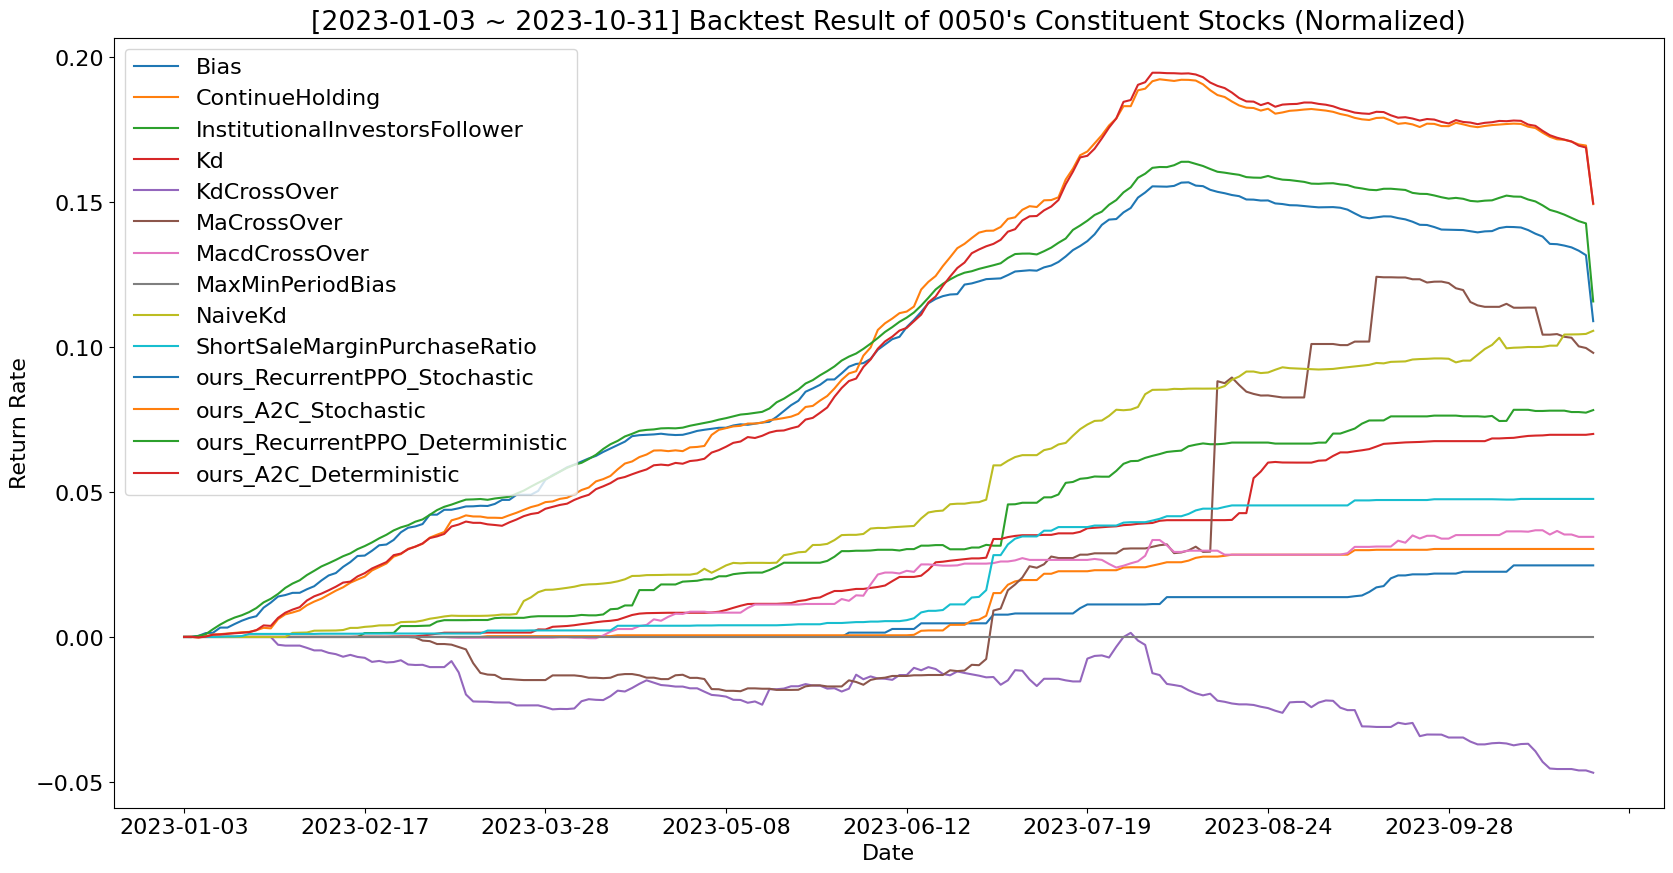

In [10]:
df = pd.DataFrame()

# FinMind strategy
for strategy in strategies:
    strategy_df = pd.DataFrame()
    for stock_id in evaluate_index:
        temp = pd.read_csv(f"output/{stock_id}_{strategy}.csv").set_index('date')
        strategy_df[stock_id] = temp['RealizedProfit'] / (TRADER_FUND - temp['trader_fund'].min())
        
    # sum all columns
    strategy_df['sum'] = strategy_df.sum(axis=1) / len(evaluate_index)
    strategy_df = strategy_df[['sum']]
    strategy_df = strategy_df.rename(columns={'sum': strategy})
    df = pd.concat([df, strategy_df], axis=1)

# RL model
for strategy in [f"{rl['name']}_Stochastic" for rl in RL_MODELS] + [f"{rl['name']}_Deterministic" for rl in RL_MODELS]:
    strategy_df = pd.DataFrame()
    for stock_id in evaluate_index:
        temp = pd.read_csv(f"output/{stock_id}_{strategy}.csv").set_index('date')
        strategy_df[stock_id] = temp['net'] / (TRADER_FUND - temp['balance'].min())
        
    # sum all columns
    strategy_df['sum'] = strategy_df.sum(axis=1) / len(evaluate_index)
    strategy_df = strategy_df[['sum']]
    strategy_df = strategy_df.rename(columns={'sum': f"ours_{strategy}"})
    df = pd.concat([df, strategy_df], axis=1)

# sort by index
df = df.sort_index()

# fill na
df = df.fillna(0)

df.plot(
    title=f"[{START_DATE} ~ {END_DATE}] Backtest Result of 0050\'s Constituent Stocks (Normalized)",
    xlabel="Date",
    ylabel="Return Rate",
)

## Statistics

In [13]:
rois_df = pd.DataFrame()
for strategy in strategies:
    rois = []
    for stock_id in evaluate_index:
        temp = pd.read_csv(f"output/{stock_id}_{strategy}.csv").set_index('date')
        rois.append(temp['RealizedProfit'].iloc[-1] / TRADER_FUND)
    
    rois_df[strategy] = rois
        
for strategy in [f"{rl['name']}_Stochastic" for rl in RL_MODELS] + [f"{rl['name']}_Deterministic" for rl in RL_MODELS]:
    rois = []
    for stock_id in evaluate_index:
        temp = pd.read_csv(f"output/{stock_id}_{strategy}.csv").set_index('date')
        rois.append(temp['net'].iloc[-1] / TRADER_FUND)
    
    rois_df[f"ours_{strategy}"] = rois
        
rois_df.describe()

,Bias,ContinueHolding,InstitutionalInvestorsFollower,Kd,KdCrossOver,MaCrossOver,MacdCrossOver,MaxMinPeriodBias,NaiveKd,ShortSaleMarginPurchaseRatio,ours_RecurrentPPO_Stochastic,ours_A2C_Stochastic,ours_RecurrentPPO_Deterministic,ours_A2C_Deterministic
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.017713,0.020332,0.049265,0.047816,-0.007361,0.012698,0.009270,0.0,0.092607,0.044144,0.108953,0.149334,0.115750,0.149559
std,0.044260,0.041221,0.147680,0.086094,0.033447,0.041377,0.025880,0.0,0.173840,0.061018,0.238562,0.337166,0.251490,0.354614
min,0.000000,0.000000,-0.126914,-0.014284,-0.139424,-0.071139,-0.037659,0.0,-0.102325,0.000000,-0.175580,-0.206039,-0.174741,-0.232329
25%,0.000000,0.002962,0.002637,0.002166,-0.011534,-0.002627,0.000000,0.0,0.007426,0.014225,-0.023973,-0.019804,-0.023945,-0.024159
50%,0.000000,0.009955,0.007939,0.011652,-0.003426,0.001056,0.000975,0.0,0.027437,0.034600,0.038655,0.042489,0.035571,0.042326
75%,0.000000,0.019985,0.029956,0.039449,-0.000107,0.012983,0.005978,0.0,0.101291,0.052744,0.145300,0.172138,0.155731,0.172542
max,0.192275,0.280000,0.963435,0.399130,0.092307,0.184497,0.096525,0.0,0.958291,0.420000,0.851080,1.506970,0.916125,1.602996


In [23]:
rois_df.describe(include='all').T[['mean', '50%', 'min', 'max']].rename(columns={'50%': 'median'})

<Axes: title={'center': "[2023-01-03 ~ 2023-10-31] Backtest Result of 0050's Constituent Stocks"}, xlabel='Date', ylabel='Return Rate'>

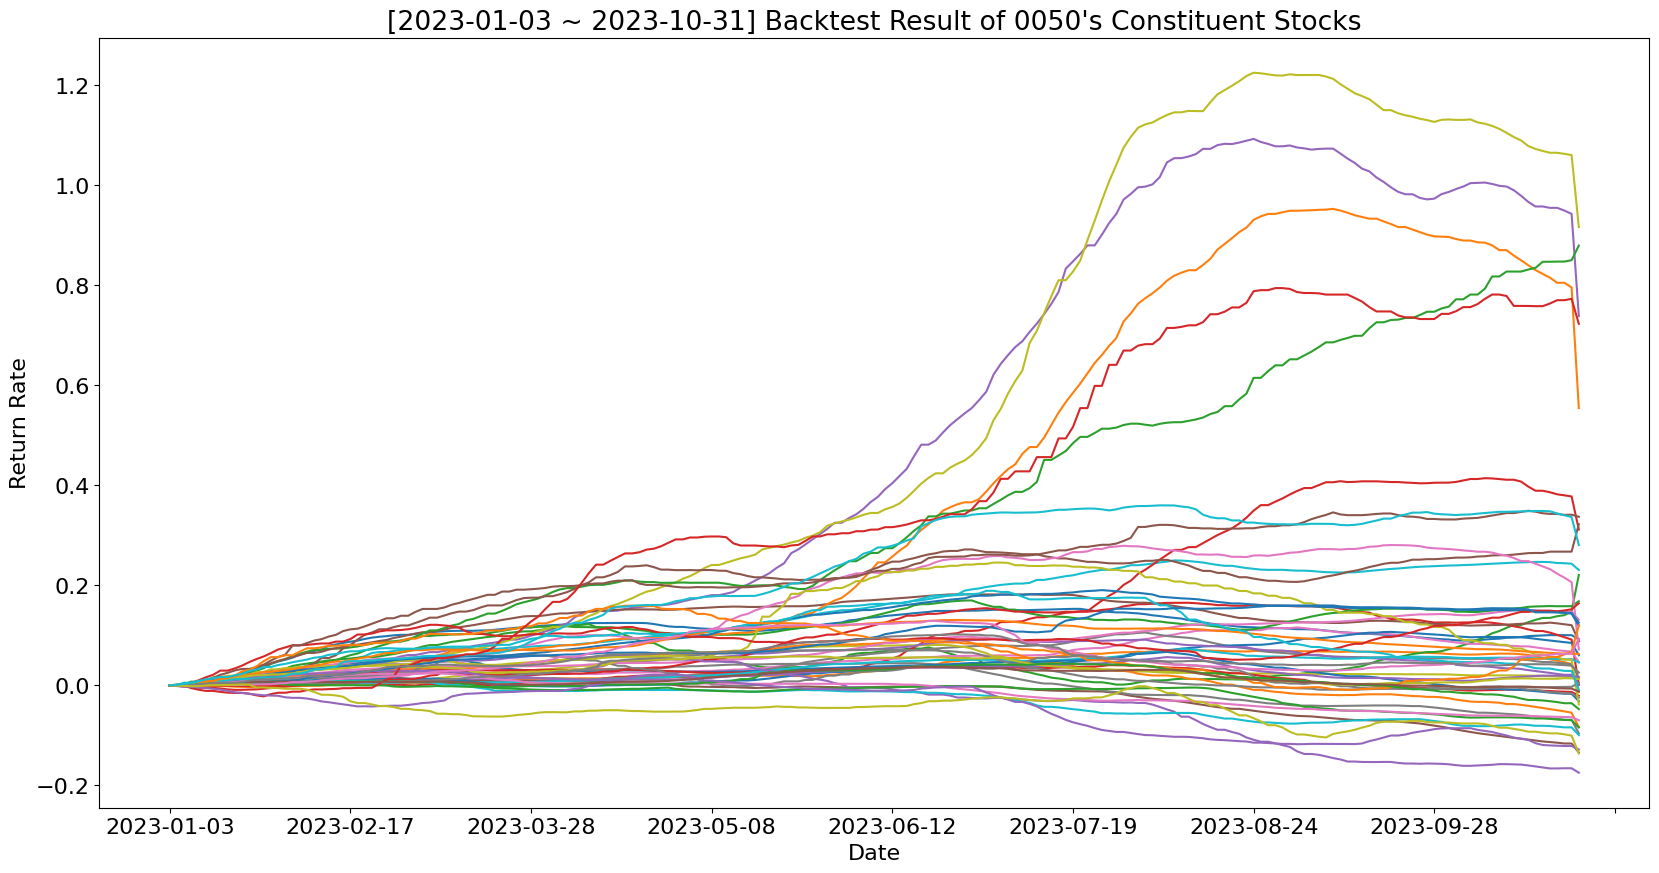

In [10]:
strategy_df = pd.DataFrame()
for stock_id in evaluate_index:
    temp = pd.read_csv(f"output/{stock_id}_{RL_MODELS[0]['name']}_Deterministic.csv").set_index('date')
    strategy_df[stock_id] = temp['net'] / TRADER_FUND

strategy_df.plot(
    title=f"[{START_DATE} ~ {END_DATE}] Backtest Result of 0050\'s Constituent Stocks",
    xlabel="Date",
    ylabel="Return Rate",
    legend=False,
)

<Axes: title={'center': "[2023-01-03 ~ 2023-10-31] Backtest Result of 0050's Constituent Stocks"}, xlabel='Date', ylabel='Return Rate'>

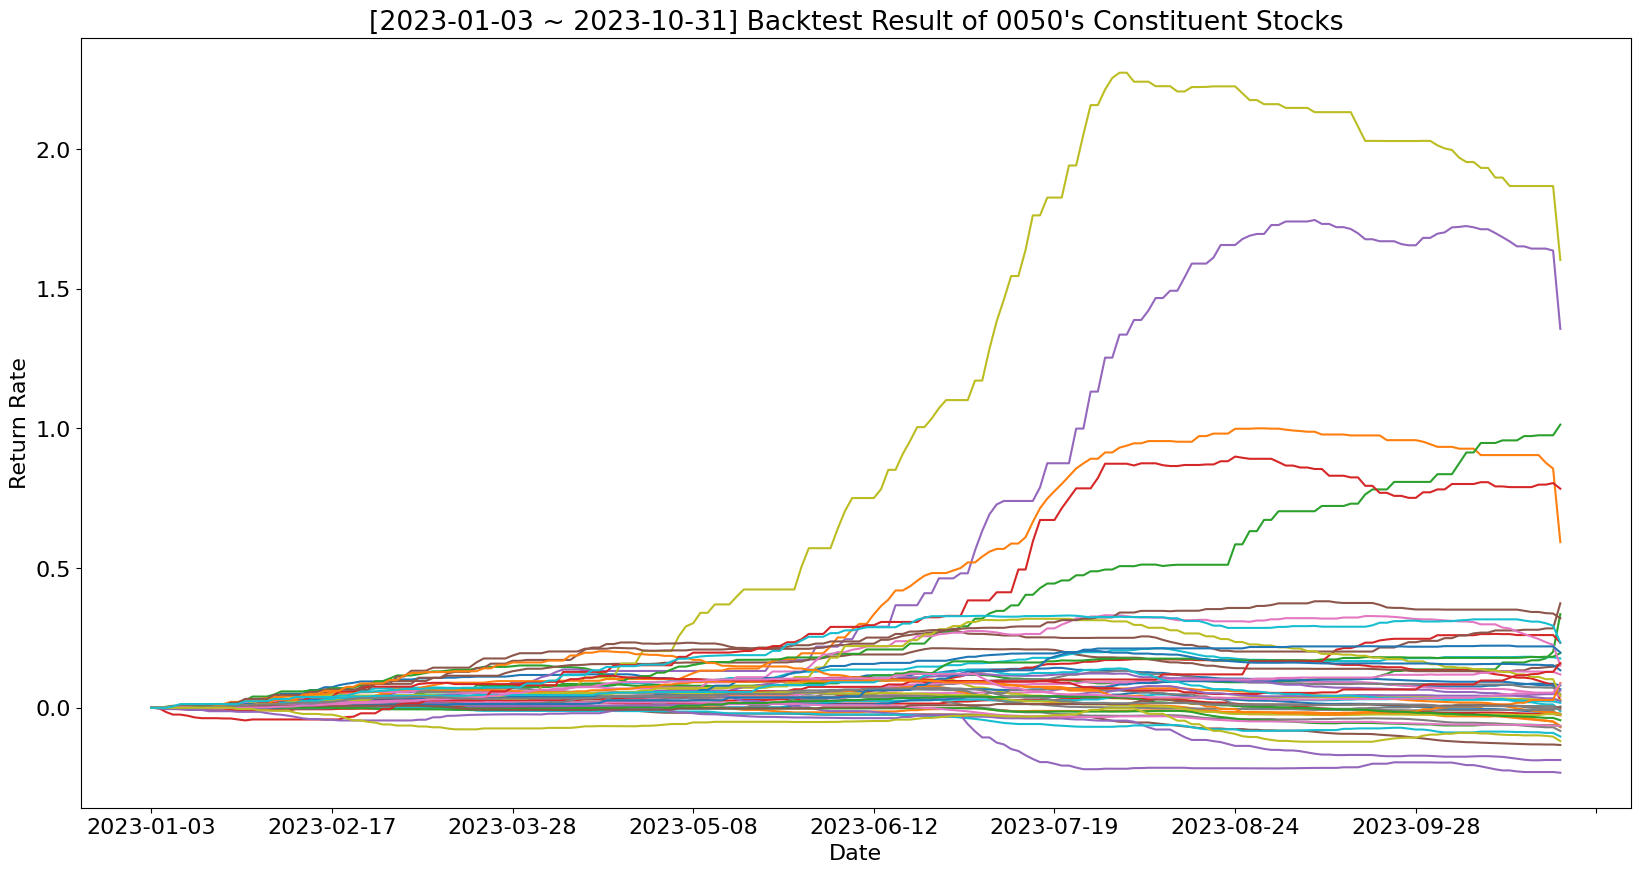

In [11]:
strategy_df = pd.DataFrame()
for stock_id in evaluate_index:
    temp = pd.read_csv(f"output/{stock_id}_{RL_MODELS[1]['name']}_Deterministic.csv").set_index('date')
    strategy_df[stock_id] = temp['net'] / TRADER_FUND

strategy_df.plot(
    title=f"[{START_DATE} ~ {END_DATE}] Backtest Result of 0050\'s Constituent Stocks",
    xlabel="Date",
    ylabel="Return Rate",
    legend=False,
)